In [ ]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [8]:
def plt_info(xlabel, ylabel, title='', legend=1):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend==1:
        plt.legend()
    plt.show()
        

#### output power vs. injection current for different temperatures

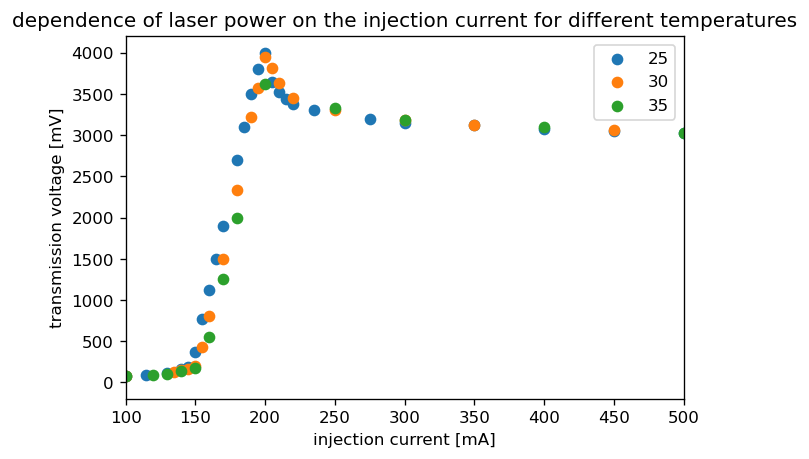

In [16]:
amplification = 5
# I_uncert
# V_uncert

T1 = 25.0
I1 = [0, 50, 100, 150, 155, 160, 165, 170, 180, 185, 190, 195, 200, 205, 210, 215, 220, 235, 275, 300,
     350, 400, 450, 500, 550, 130, 140, 145, 115]   # mA
V1 = [3, 24, 77, 370, 770, 1120, 1500, 1900, 2700, 3100, 3500, 3800, 4000, 3650, 3520, 3440, 3380, 3300, 3200, 3150,
     3120, 3080, 3050, 3030, 3010, 120, 160, 182, 88]   # mV

T2 = 30.1
I2 = [0, 100, 150, 200, 250, 300, 350, 450, 550, 170, 180, 190, 160, 140, 155, 135, 195, 205, 210, 220, 145]
V2 = [3, 76, 200, 3950, 3300, 3180, 3120, 3060, 3020, 1500, 2330, 3220, 810, 150, 435, 130, 3570, 3820, 3630, 3450, 165]

I3 = 35.0
I3 = [0, 50, 80, 90, 100, 150, 200, 250, 300, 400, 500, 120, 160, 180, 140, 170, 130]
V3 = [3, 24, 56, 67, 75, 170, 3620, 3330, 3190, 3100, 3030, 87, 550, 2000, 136, 1250, 107]

plt.figure(dpi=120)
plt.scatter(I1, V1, label='25')
plt.scatter(I2, V2, label='30')
plt.scatter(I3, V3, label='35')
plt.xlim(100, 500)
plt_info('injection current [mA]', 'transmission voltage [mV]', 'dependence of laser power on the injection '+
         'current for different temperatures')

#### transmission spectrum

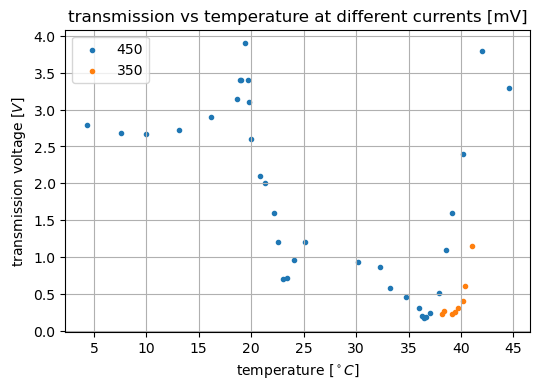

In [75]:
amplification = 5
I1 = 450 # mA
T1 = np.array([4.3, 16.2, 18.6, 18.9, 19.4, 19.7, 19.8, 20, 20.8, 21.3, 22.2, 23, 25.1, 30.2, 34.8, 38.6,
              39.1, 40.2, 42, 44.6, 10, 13.1, 7.6, 19, 23.4, 24.1, 22.6, 32.3, 33.2, 36, 37, 37.9,
              36.7, 36.3, 36.5]) # Celsius
V1 = np.array([2.79, 2.9, 3.15, 3.4, 3.9, 3.4, 3.1, 2.6, 2.1, 2, 1.6, 0.7, 1.2, 0.93, 0.46, 1.1,
              1.6, 2.4, 3.8, 3.3, 2.67, 2.72, 2.68, 3.4, 0.71, 0.96, 1.2, 0.86, 0.58, 0.3, 0.24, 0.51,
              0.18, 0.2, 0.17]) # V

I2 = 350
T2 = np.array([38.2, 39.7, 41, 40.4, 40.2, 39.1, 39.4, 38.4])
V2 = np.array([0.225, 0.3, 1.15, 0.6, 0.4, 0.23, 0.25, 0.26]) # 0.15 to 0.45 at 39.7


plt.figure(dpi=100)
plt.scatter(T1, V1, marker='.', label=I1)
plt.scatter(T2, V2, marker='.', label=I2)
plt.grid()
# plt.ylim(0, 0.5)
# plt.xlim(32, 42)S
plt_info(r'temperature $[^\circ C]$', r'transmission voltage [$V$]', 'transmission vs temperature at '+
         'different currents [mV]')